In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np


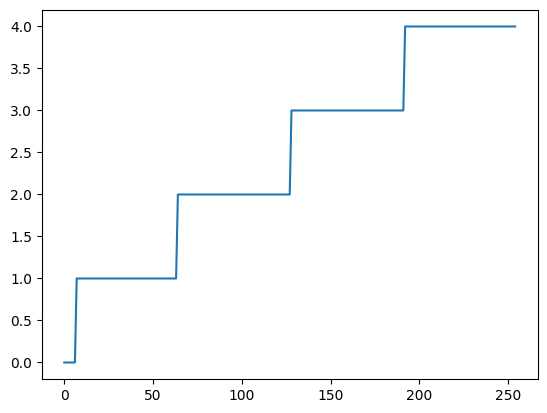

In [55]:
plt.figure(1)
plt.plot([(1+(x>>6)) * (min(255, x*20) >> 7) for x in range(255)])
plt.show()


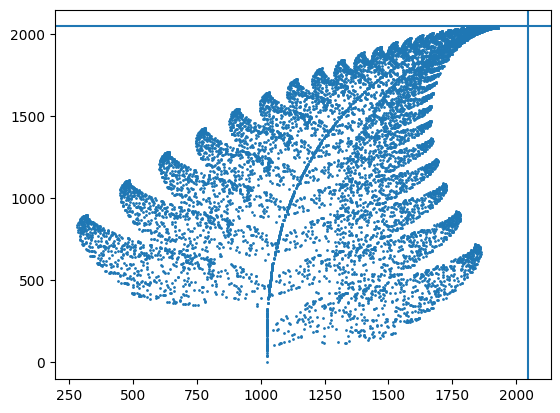

281.03927974111025 1928.58816361407
0.0 2047.6002177013934


In [15]:
x = 0
y = 0

xs = []
ys = []

for n in range(11000):
    #xs.append(x+900)
    #ys.append(100+1800*y/3500)
    xs.append(341*x+1024)
    ys.append(204.8*y)


    r = random.random()
    if r < 0.01:
        x, y =  0.00 * x + 0.00 * y,  0.00 * x + 0.16 * y + 0.00
    elif r < 0.86:
        x, y =  0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y + 1.60
    elif r < 0.93:
        x, y =  0.20 * x - 0.26 * y,  0.23 * x + 0.22 * y + 1.60
    else:
        x, y = -0.15 * x + 0.28 * y,  0.26 * x + 0.24 * y + 0.44

plt.figure()
plt.plot(xs, ys, 'o', markersize=1)
plt.axhline(2048)
plt.axvline(2048)
plt.show()
print(min(xs), max(xs))
print(min(ys), max(ys))



In [12]:
2048/6

341.3333333333333

In [2]:
def f(x,y):
    x1, y1 =  0.00 * x + 0.00 * y,  0.00 * x + 0.16 * y + 0.00
    x2, y2 =  0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y + 1.60
    x3, y3 =  0.20 * x - 0.26 * y,  0.23 * x + 0.22 * y + 1.60
    x4, y4 = -0.15 * x + 0.28 * y,  0.26 * x + 0.24 * y + 0.44
    return [[x1,y1],[x2,y2],[x3,y3],[x4,y4]]

def u(x,y, IMAGE_SIZE=2048):
    return (-IMAGE_SIZE/6) * x + IMAGE_SIZE/2,  (IMAGE_SIZE/10) * y

def u_(x,y,IMAGE_SIZE=2048):
    return (-6/IMAGE_SIZE) * (x - IMAGE_SIZE/2),  (10/IMAGE_SIZE) * y

def A(x,y):
    x1, y1 =  0.00 * x + 0.00 * y,  0.00 * x + 0.16 * y
    x2, y2 =  0.85 * x + 0.04 * y, -0.04 * x + 0.85 * y
    x3, y3 =  0.20 * x - 0.26 * y,  0.23 * x + 0.22 * y
    x4, y4 = -0.15 * x + 0.28 * y,  0.26 * x + 0.24 * y
    return [[x1,y1],[x2,y2],[x3,y3],[x4,y4]]

# print(u(0,0))
# print(u(0,1.6))
# print(u(0,0.44))
# A(100, 0)
[x_,y_] = u_(0,0)
[u(x,y) for [x,y] in f(x_, y_)]

[(1024.0, 0.0),
 (153.60000000000014, 303.104),
 (819.2, 468.992),
 (1177.6, 249.856)]

In [34]:
u(f(3,0)[1][0],f(3,0)[1][1])

(153.60000000000014, 303.104)

In [9]:
u(0, 0)


(1024.0, 0.0)

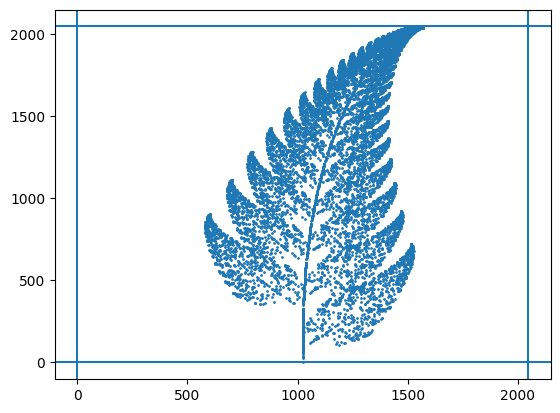

578.0954636586316 1570.3926791424337
0 2046.7937204741356


In [3]:
x = 1024
y = 0

xs = []
ys = []

for n in range(11000):
    #xs.append(x+900)
    #ys.append(100+1800*y/3500)
    xs.append(x)
    ys.append(y)


    r = random.random()
    if r < 0.01:
        x, y =  0.00 * x + 0.00 * y + 1024,  0.00 * x + 0.16 * y
    elif r < 0.86:
        x, y =  0.85 * x + 0.04 * y + 154, -0.04 * x + 0.85 * y + 368.64
    elif r < 0.93:
        x, y =  0.20 * x - 0.26 * y + 819,  0.23 * x + 0.22 * y + 92.16000000000005
    else:
        x, y = -0.15 * x + 0.28 * y + 1177.6,  0.26 * x + 0.24 * y -176.128

plt.figure()
plt.plot(xs, ys, 'o', markersize=1)
plt.axhline(2048)
plt.axvline(2048)
plt.axhline(0)
plt.axvline(0)
plt.show()
print(min(xs), max(xs))
print(min(ys), max(ys))



1.2315714512993055


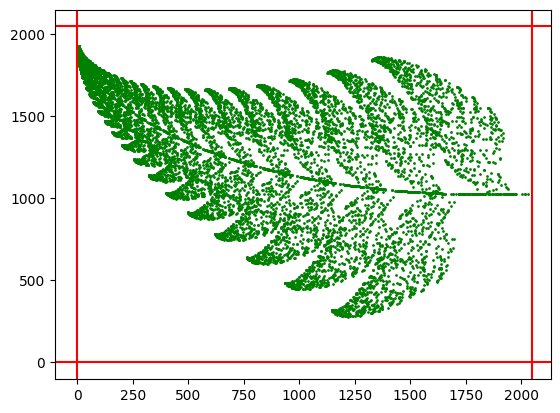

In [8]:
from numpy.linalg import inv

def fern(IMAGE_SIZE=2048):
    point = np.array([IMAGE_SIZE-100, IMAGE_SIZE/2])

    Gamma = np.array([
        [0, -IMAGE_SIZE/10],
        [IMAGE_SIZE/6,   0]
    ])
    Delta = np.array([IMAGE_SIZE, IMAGE_SIZE/2])
    
    A0 = Gamma @ np.array([[0   ,  0    ],[0    ,0.16]]) @ inv(Gamma)
    A1 = Gamma @ np.array([[0.85,  0.04 ],[-0.04,0.85]]) @ inv(Gamma)
    A2 = Gamma @ np.array([[0.20, -0.26], [0.23,0.22]]) @ inv(Gamma)
    A3 = Gamma @ np.array([[-0.15, 0.28], [0.26,0.24]]) @ inv(Gamma)

    B0 = np.array([0, 0   ])
    B1 = np.array([0, 1.60])
    B2 = np.array([0, 1.60])
    B3 = np.array([0, 0.44])

    points = []
    for n in range(11000):
        #xs.append(x+900)
        #ys.append(100+1800*y/3500)
        points.append(point)


        r = random.random()
        if r < 0.01:
            point =  A0 @ (point - Delta) + Gamma @ B0 + Delta
        elif r < 0.86:
            point =  A1 @ (point - Delta) + Gamma @ B1 + Delta
        elif r < 0.93:
            point =  A2 @ (point - Delta) + Gamma @ B2 + Delta
        else:
            point =  A3 @ (point - Delta) + Gamma @ B3 + Delta
    return np.array(points)

IMAGE_SIZE = 2048
plt.figure()
x,y = fern().T
print((np.max(x) - np.min(x)) / (np.max(y) - np.min(y)))
plt.plot(x,y, 'o', markersize=1, color='green')
plt.axhline(IMAGE_SIZE, color='red')
plt.axvline(IMAGE_SIZE, color='red')
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.show()

In [9]:
Gamma = np.array([
    [0, -IMAGE_SIZE/10],
    [IMAGE_SIZE/6,   0]
])
Delta = np.array([IMAGE_SIZE, IMAGE_SIZE/2])

A0 = Gamma @ np.array([[0   ,  0    ],[0    ,0.16]]) @ inv(Gamma)
A1 = Gamma @ np.array([[0.85,  0.04 ],[-0.04,0.85]]) @ inv(Gamma)
A2 = Gamma @ np.array([[0.20, -0.26], [0.23,0.22]]) @ inv(Gamma)
A3 = Gamma @ np.array([[-0.15, 0.28], [0.26,0.24]]) @ inv(Gamma)

B0 = np.array([0, 0   ])
B1 = np.array([0, 1.60])
B2 = np.array([0, 1.60])
B3 = np.array([0, 0.44])

In [10]:
point = np.array([0,0])
print(A0 @ (point - Delta) + Gamma @ B0 + Delta)
print(A1 @ (point - Delta) + Gamma @ B1 + Delta)
print(A2 @ (point - Delta) + Gamma @ B2 + Delta)
print(A3 @ (point - Delta) + Gamma @ B3 + Delta)

[1720.32 1024.  ]
[-45.056      290.13333333]
[1411.072       -68.26666667]
[1626.112      2133.33333333]


In [11]:
print(A0, end='\n\n')
print(A1, end='\n\n')
print(A2, end='\n\n')
print(A3, end='\n\n')

[[0.16 0.  ]
 [0.   0.  ]]

[[ 0.85        0.024     ]
 [-0.06666667  0.85      ]]

[[ 0.22       -0.138     ]
 [ 0.43333333  0.2       ]]

[[ 0.24       -0.156     ]
 [-0.46666667 -0.15      ]]

